In [1]:
#!pip install pandas scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import itertools as it
import operator as op

## NumPy Examples

### Array Creation

In [2]:
# array creation by sequence
A = np.array([[1,2,3],[4,5,6]])
print("This is array A:\n",A)

This is array A:
 [[1 2 3]
 [4 5 6]]


In [3]:
# pre-format arrays with zeros/ones
A = np.zeros((2,3))
B = np.ones(5) 
C = np.zeros(shape=(100,100), dtype=float)
D = np.ones((2,2),dtype=np.int16)
E = np.empty((2,2))
print("This is array A:\n",A,"\nand array B:\n",B)
print("This is array C:\n",C)
print("This is array D:\n",D)
print("This is array E:\n",E)

This is array A:
 [[0. 0. 0.]
 [0. 0. 0.]] 
and array B:
 [1. 1. 1. 1. 1.]
This is array C:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
This is array D:
 [[1 1]
 [1 1]]
This is array E:
 [[4.9e-324 1.5e-323]
 [1.5e-323 4.9e-324]]


In [4]:
# creation through ranges 
A = np.arange(2,10,2) # array from 2 to 10 with steps of 2
B = np.linspace(0,4.5,10) # array from 0 to 4.5 at steps of 0.5
print("This is array A:\n",A,"\nand B:\n",B)

This is array A:
 [2 4 6 8] 
and B:
 [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]


In [5]:
# from random source 
A = np.random.rand(1,2)
B = 2 * np.random.randn(1,2) + 10 # mu = 10, sigma = 2 
print(A,B)

[[0.62595194 0.17883401]] [[12.85340087  7.40711832]]


In [6]:
# arrays have attributes that can be printed to have informations that are needed
print(A.ndim, A.shape, A.size, A.dtype, A.itemsize, A.data)

2 (1, 2) 2 float64 8 <memory at 0x7f94720b5380>


### Manipulation of arrays

In [7]:
# reshape array
A = np.arange(12).reshape(4,3) # reshape an array of 12 elements arranged in 3 columns and 4 rows
print(A)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [8]:
# A is an array of 10 elements, by doing A[2,5] a sub-array is given with only elements between 2 and 5
A = np.arange(10)
A[2:5]  

array([2, 3, 4])

In [9]:
# A is an array of 9 elements, ordered in 3 columns and 3 rowe. 
A = np.arange(9).reshape(3,3)
A, A[1], A[:,1] # A gives the whole 3x3 matrix, A[1] gives only the row 1 of the matrix, A[:,1] gives only column 1 of the matrix

(array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]),
 array([3, 4, 5]),
 array([1, 4, 7]))

In [10]:
# for loop over A. Each element of the matrix A is squared
for i in A: 
    print (i**2)

[0 1 4]
[ 9 16 25]
[36 49 64]


In [11]:
# Alternative way to loop over A and square each element of the matrix
[i**2 for i in A]

[array([0, 1, 4]), array([ 9, 16, 25]), array([36, 49, 64])]

In [12]:
# Flat: Return a copy of the array collapsed into one dimension.
[i**2 for i in A.flat]

[0, 1, 4, 9, 16, 25, 36, 49, 64]

In [13]:
# reshaping
A = np.floor(10*np.random.random((3,4)))
print(A, A.shape)
print(A.ravel()) # flatten array
print(A.reshape(6,2)) 
print(A.T, A.T.shape)

[[7. 2. 3. 2.]
 [2. 1. 5. 4.]
 [7. 4. 9. 4.]] (3, 4)
[7. 2. 3. 2. 2. 1. 5. 4. 7. 4. 9. 4.]
[[7. 2.]
 [3. 2.]
 [2. 1.]
 [5. 4.]
 [7. 4.]
 [9. 4.]]
[[7. 2. 7.]
 [2. 1. 4.]
 [3. 5. 9.]
 [2. 4. 4.]] (4, 3)


In [14]:
# use resize to reshape in place
B = A
A.resize(2,6)
print(A)
B = B.reshape(3,-1) # -1 calc cols automatically
print(B)

[[7. 2. 3. 2. 2. 1.]
 [5. 4. 7. 4. 9. 4.]]
[[7. 2. 3. 2.]
 [2. 1. 5. 4.]
 [7. 4. 9. 4.]]


In [15]:
# stacking
A = np.floor(10*np.random.random((3,4)))
B = np.floor(10*np.random.random((3,4)))
print(A)
print(B)
C = np.vstack((A,B))
print(C)
D = np.hstack((A,B))
print(D)

[[3. 4. 3. 7.]
 [2. 9. 4. 8.]
 [9. 3. 0. 4.]]
[[5. 3. 8. 5.]
 [4. 0. 2. 4.]
 [2. 2. 8. 4.]]
[[3. 4. 3. 7.]
 [2. 9. 4. 8.]
 [9. 3. 0. 4.]
 [5. 3. 8. 5.]
 [4. 0. 2. 4.]
 [2. 2. 8. 4.]]
[[3. 4. 3. 7. 5. 3. 8. 5.]
 [2. 9. 4. 8. 4. 0. 2. 4.]
 [9. 3. 0. 4. 2. 2. 8. 4.]]


In [16]:
# splitting
A = np.floor(10*np.random.random((2,12)))
print("A", A)
B, C, D = np.hsplit(A,3)
print("B", B)
print("C", C)
print("D", D)
E, F, G = np.hsplit(A,(3,4)) # split A after col 3 and col 4
print("E", E)
print("F", F)
print("G", G)

A [[4. 1. 8. 2. 9. 2. 6. 7. 5. 7. 7. 0.]
 [5. 0. 8. 6. 9. 0. 1. 8. 8. 7. 4. 4.]]
B [[4. 1. 8. 2.]
 [5. 0. 8. 6.]]
C [[9. 2. 6. 7.]
 [9. 0. 1. 8.]]
D [[5. 7. 7. 0.]
 [8. 7. 4. 4.]]
E [[4. 1. 8.]
 [5. 0. 8.]]
F [[2.]
 [6.]]
G [[9. 2. 6. 7. 5. 7. 7. 0.]
 [9. 0. 1. 8. 8. 7. 4. 4.]]


In [17]:
a = [1, 2, 3, 4]  # list like object
b = ['a', 'b', 'c', 'd']  # another list like object
c = zip(a, b)  # a generator which will 'merge' 2 list-like objects into a list of pairs
list(c)  # lets look at the output

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]

### Logic check

In [18]:
# logic check: Check if the elements of the matrix A (above) are greater of 2 or not and return False or True.
A > 2

array([[ True, False,  True, False,  True, False,  True,  True,  True,
         True,  True, False],
       [ True, False,  True,  True,  True, False, False,  True,  True,
         True,  True,  True]])

### Sort

In [19]:
# sort
a = np.floor(10*np.random.random((2,6)))
print(a)
# sort - row wise
b = np.sort(a)
print(b)

[[1. 1. 6. 2. 2. 5.]
 [1. 1. 1. 8. 5. 3.]]
[[1. 1. 2. 2. 5. 6.]
 [1. 1. 1. 3. 5. 8.]]


In [20]:
# sort - col wise
c = np.sort(a, axis=0)
print(c)

[[1. 1. 1. 2. 2. 3.]
 [1. 1. 6. 8. 5. 5.]]


In [21]:
# sort flatten
d = np.sort(a, axis=None)
print(d)

[1. 1. 1. 1. 1. 2. 2. 3. 5. 5. 6. 8.]


### Operations

In [22]:
# element wise add 
B = A
C = A + B
print(A)
print('+')
print(B)
print('=')
print(C)

[[4. 1. 8. 2. 9. 2. 6. 7. 5. 7. 7. 0.]
 [5. 0. 8. 6. 9. 0. 1. 8. 8. 7. 4. 4.]]
+
[[4. 1. 8. 2. 9. 2. 6. 7. 5. 7. 7. 0.]
 [5. 0. 8. 6. 9. 0. 1. 8. 8. 7. 4. 4.]]
=
[[ 8.  2. 16.  4. 18.  4. 12. 14. 10. 14. 14.  0.]
 [10.  0. 16. 12. 18.  0.  2. 16. 16. 14.  8.  8.]]


In [23]:
# element wise mult
print('A:\n',A)
C = A * 4
print('C:\n',C)

A:
 [[4. 1. 8. 2. 9. 2. 6. 7. 5. 7. 7. 0.]
 [5. 0. 8. 6. 9. 0. 1. 8. 8. 7. 4. 4.]]
C:
 [[16.  4. 32.  8. 36.  8. 24. 28. 20. 28. 28.  0.]
 [20.  0. 32. 24. 36.  0.  4. 32. 32. 28. 16. 16.]]


In [24]:
# element wise f()
def f(x):
    return 3*x**2 - 2*x + 7
print('A:\n',A)
output = f(A)
print('f(A):\n',output)

A:
 [[4. 1. 8. 2. 9. 2. 6. 7. 5. 7. 7. 0.]
 [5. 0. 8. 6. 9. 0. 1. 8. 8. 7. 4. 4.]]
f(A):
 [[ 47.   8. 183.  15. 232.  15. 103. 140.  72. 140. 140.   7.]
 [ 72.   7. 183. 103. 232.   7.   8. 183. 183. 140.  47.  47.]]


In [25]:
# function apply on linspace
x = np.linspace(0, 2*3.14, 10)
f = np.sin(x)
f

array([ 0.        ,  0.64251645,  0.98468459,  0.8665558 ,  0.34335012,
       -0.34035671, -0.86496168, -0.98523494, -0.644954  , -0.0031853 ])

In [26]:
# inplace 
print('Before:\n',A)
A *= 2
print('After:\n',A)

Before:
 [[4. 1. 8. 2. 9. 2. 6. 7. 5. 7. 7. 0.]
 [5. 0. 8. 6. 9. 0. 1. 8. 8. 7. 4. 4.]]
After:
 [[ 8.  2. 16.  4. 18.  4. 12. 14. 10. 14. 14.  0.]
 [10.  0. 16. 12. 18.  0.  2. 16. 16. 14.  8.  8.]]


In [27]:
# sums along axis
print(A)
print(A.sum(axis=0)) # sum col
print(A.sum(axis=1)) # sum row
print(A.cumsum(axis=1)) # cumulative sum row

[[ 8.  2. 16.  4. 18.  4. 12. 14. 10. 14. 14.  0.]
 [10.  0. 16. 12. 18.  0.  2. 16. 16. 14.  8.  8.]]
[18.  2. 32. 16. 36.  4. 14. 30. 26. 28. 22.  8.]
[116. 120.]
[[  8.  10.  26.  30.  48.  52.  64.  78.  88. 102. 116. 116.]
 [ 10.  10.  26.  38.  56.  56.  58.  74.  90. 104. 112. 120.]]


In [28]:
# broadcast row vector on all rows
A = np.ones((5,5))
B = A + [1, 2, 3, 4, 5]
B

array([[2., 3., 4., 5., 6.],
       [2., 3., 4., 5., 6.],
       [2., 3., 4., 5., 6.],
       [2., 3., 4., 5., 6.],
       [2., 3., 4., 5., 6.]])

In [29]:
# universial functions 
print(np.exp(A))
print(np.sqrt(A))

[[2.71828183 2.71828183 2.71828183 2.71828183 2.71828183]
 [2.71828183 2.71828183 2.71828183 2.71828183 2.71828183]
 [2.71828183 2.71828183 2.71828183 2.71828183 2.71828183]
 [2.71828183 2.71828183 2.71828183 2.71828183 2.71828183]
 [2.71828183 2.71828183 2.71828183 2.71828183 2.71828183]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


### Basic Statistics

In [30]:
# stats properties
A = np.arange(9).reshape(3,3)
print(A.sum(), A.min(), A.max())

36 0 8


In [31]:
# time example
time = np.linspace(20, 145, 5)
data = np.sin(np.arange(20)).reshape(5,4) 
print(time)
print(data)

[ 20.    51.25  82.5  113.75 145.  ]
[[ 0.          0.84147098  0.90929743  0.14112001]
 [-0.7568025  -0.95892427 -0.2794155   0.6569866 ]
 [ 0.98935825  0.41211849 -0.54402111 -0.99999021]
 [-0.53657292  0.42016704  0.99060736  0.65028784]
 [-0.28790332 -0.96139749 -0.75098725  0.14987721]]


In [32]:
ind = data.argmax(axis=0) # get max index for each series (col)
time_max = time[ind] # times corresponding to maxima
print(ind)
print(time_max)

[2 0 3 1]
[ 82.5   20.   113.75  51.25]


### Basic Linear Algebra

In [33]:
# matrix product
A = B
A @ B

array([[ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.]])

In [34]:
# matrix product alt 
A.dot(B)

array([[ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.],
       [ 40.,  60.,  80., 100., 120.]])

In [35]:
# matrix
m = np.matrix([[1,-2,3],[0,4,5],[7,8,-9]])
v = np.matrix([[2],[3],[4]])

In [36]:
# transpose
m.T

matrix([[ 1,  0,  7],
        [-2,  4,  8],
        [ 3,  5, -9]])

In [37]:
# inverse
m.I

matrix([[ 0.33043478, -0.02608696,  0.09565217],
        [-0.15217391,  0.13043478,  0.02173913],
        [ 0.12173913,  0.09565217, -0.0173913 ]])

In [38]:
# multiply 
m * v

matrix([[ 8],
        [32],
        [ 2]])

In [39]:
# determinant 
np.linalg.det(m)

-229.99999999999983

In [40]:
# eigenvalues
np.linalg.eigvals(m)

array([-13.11474312,   2.75956154,   6.35518158])

In [41]:
# Solve for x in mx = v
np.linalg.solve(m, v)

matrix([[0.96521739],
        [0.17391304],
        [0.46086957]])

## Pandas Examples

## Views vs Copy

Pandas Dataframes are flexible, potentially very large objects. In order to avoid un-necessarily copying objects as they get moved around, repeatedly accessed Pandas employs a Copy on Write methodology.
This means that when you query an object you will often get a lightweight reference back to what you're interested in vs an entirely new object. The object only changes when it is written to.

This behaviour is often confusing and catches experienced programmers off-guard, so they have implemented a `SettingWithCopyWarning` warning which is thrown when something is going on that the library expects is likely due to either un-clear instructions, or, buggy code from the user.

As general advice, if you see this error, try to modify your code to remove the warning as the resulting code is normally easier to read and the intentions much clearer.

In [42]:
# First lets make a dataframe
df = pd.DataFrame({"a": np.arange(4), "b": np.arange(4)})
df

,a,b
0,0,0
1,1,1
2,2,2
3,3,3


In [43]:
# Create a view of a dataframe
my_slice = df.iloc[
    1:3,
]

# iloc and loc ALWAYS return a 'view' from a pandas dataframe
# This is NOT always wanted, but this offers performance improvements and makes things consistent

# This WILL Throw a warning as it is modifying a view
my_slice['a'] = [7, 8]

# This shows how we have modified the view
print(my_slice)
print()
# But we have NOT modified the dataframe that we're interested in
print(df)

   a  b
1  7  1
2  8  2

   a  b
0  0  0
1  1  1
2  2  2
3  3  3


/tmp/ipykernel_456/4085188431.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_slice['a'] = [7, 8]


In [44]:
# First lets make a dataframe
df = pd.DataFrame({"a": np.arange(4), "b": np.arange(4)})
df

# Create a view of a dataframe
my_slice = df.iloc[
    1:3,
]

# What if we try to modify df in-place using brakets?
# This is also bad behaviour! _Sometimes_ this will throw an error, but not always
df['a'][1:3]=[7, 8]

# This shows how we have modified the view
print(my_slice)
print()
# But we have also modified the dataframe
print(df)

   a  b
1  7  1
2  8  2

   a  b
0  0  0
1  7  1
2  8  2
3  3  3


In [45]:
# First lets make a dataframe
df = pd.DataFrame({"a": np.arange(4), "b": np.arange(4)})

# If we want to guarantee that we NEVER get a view back, you should request a new dataframe be created with .copy()

my_copy = df.iloc[1:3,].copy()

my_copy['a'] = [7, 8]

# We have explicitly made a copy so this makes sense
print(my_copy)
print()
print(df)

   a  b
1  7  1
2  8  2

   a  b
0  0  0
1  1  1
2  2  2
3  3  3


In [46]:
# First lets make a dataframe
df = pd.DataFrame({"a": np.arange(4), "b": np.arange(4)})

# Lets create a view (this is a reference NOT a new object)
my_slice = df.iloc[
    1:3,
]

#Lets get a reference to the column we want to change
temp = df['a'].copy()
# Lets modify the 'a' column in the original datatframe
temp[1:3] = [7,8]

# The view (shallow reference to the dataframe) is still the same
print(my_slice)
print()
# The dataframe has NOT been changed
print(df)

   a  b
1  1  1
2  2  2

   a  b
0  0  0
1  1  1
2  2  2
3  3  3


In [47]:
# First lets make a dataframe
df = pd.DataFrame({"a": np.arange(4), "b": np.arange(4)})
df

# Lets create a view (this is a reference NOT a new object)
my_slice = df.iloc[
    1:3,
]

#Lets get a reference to the column we want to change
temp = df['a'].copy()
temp[1:3] = [7,8]
# Lets replace the 'a' column in the original datatframe
df['a'] = temp

# The view (shallow reference to the dataframe), has NOT been updated
print(my_slice)
print()
# The dataframe HAS now been modified
print(df)

   a  b
1  1  1
2  2  2

   a  b
0  0  0
1  7  1
2  8  2
3  3  3


### Create

In [48]:
# DF from dictionary 
ex1 = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df1 = pd.DataFrame(ex1)
df1

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [49]:
ex2 = {'one' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd']),
     'two' : pd.Series([1., 2., 3.], index=['a', 'b', 'c'])}
df2 = pd.DataFrame(ex2)
df2

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,4.0,NaN


In [50]:
# define DF from random numbers 
dfr1 = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
dfr2 = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
dfr1.astype('int32').dtypes

A    int32
B    int32
C    int32
D    int32
dtype: object

In [51]:
# multi-index frame (dict of tuples)
pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
    ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
    ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
    ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
    ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

### Combining

In [52]:
# simple addition
# define variables and target 
variables = ['A','B']
target   = ['D']


# combine variables and target to create a smaller dataset of dfr1 (without C column)
dfsum = dfr1[variables+target]



# Shuffle dataset
dfsum = dfsum.sample(frac=1).reset_index(drop=True)

# Get first 2 observations of dfsum columns == 0
df_frame = [dfsum[dfsum.A == 0].head(2),
            dfsum[dfsum.B == 0].head(2)]
# concat the df_frame in a new dataset df_sample
df_sample = pd.concat(df_frame)
df_sample

,A,B,D


In [53]:
# addition with 2 different DFs
dfSum2 = df1 + df2
dfSum2

,one,two
a,2.0,2.0
b,4.0,4.0
c,6.0,6.0
d,NaN,NaN


In [54]:
# operations automatically align the data based on label
df1[1:] + df1[:-1]

,one,two
a,NaN,NaN
b,4.0,4.0
c,6.0,6.0
d,NaN,NaN


In [55]:
# create new column from existing columns
df3 = df1
df3['three'] = df3['one'] * df3['two']
df3

,one,two,three
a,1.0,1.0,1.0
b,2.0,2.0,4.0
c,3.0,3.0,9.0
d,NaN,4.0,NaN


In [56]:
# append boolean column based on conditional 
df3['flag'] = df3['one'] > 2
df3

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [57]:
# append scalar
df3['five'] = 6.
df3

,one,two,three,flag,five
a,1.0,1.0,1.0,False,6.0
b,2.0,2.0,4.0,False,6.0
c,3.0,3.0,9.0,True,6.0
d,NaN,4.0,NaN,False,6.0


In [58]:
# append random series 
df3['random'] = pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd'])
df3

,one,two,three,flag,five,random
a,1.0,1.0,1.0,False,6.0,1.270290
b,2.0,2.0,4.0,False,6.0,0.203471
c,3.0,3.0,9.0,True,6.0,-1.065569
d,NaN,4.0,NaN,False,6.0,-0.103356


In [59]:
# append using assign from precomputing values (not persistent)
df3.assign(ratio = (df3.one / df3.random))

,one,two,three,flag,five,random,ratio
a,1.0,1.0,1.0,False,6.0,1.270290,0.787222
b,2.0,2.0,4.0,False,6.0,0.203471,9.829421
c,3.0,3.0,9.0,True,6.0,-1.065569,-2.815396
d,NaN,4.0,NaN,False,6.0,-0.103356,NaN


In [60]:
# assign with lambda (not persistent)
df3.assign(ratio_two = lambda x: (x.two / x.random))

,one,two,three,flag,five,random,ratio_two
a,1.0,1.0,1.0,False,6.0,1.270290,0.787222
b,2.0,2.0,4.0,False,6.0,0.203471,9.829421
c,3.0,3.0,9.0,True,6.0,-1.065569,-2.815396
d,NaN,4.0,NaN,False,6.0,-0.103356,-38.701205


In [61]:
# subtract all columns by first column - broadcasting column wise
df3.sub(df3['one'], axis=0)

,one,two,three,flag,five,random
a,0.0,0.0,0.0,-1.0,5.0,0.270290
b,0.0,0.0,2.0,-2.0,4.0,-1.796529
c,0.0,0.0,6.0,-2.0,3.0,-4.065569
d,NaN,NaN,NaN,NaN,NaN,NaN


### Resizing and Reshaping

In [62]:
# pop column (can only run once in notebook)
flag = df3.pop('three')
flag

a    1.0
b    4.0
c    9.0
d    NaN
Name: three, dtype: float64

In [63]:
# transpose column names - get first 5 columns
dfr1[:5].T

,0,1,2,3,4
A,-0.445814,2.368004,0.096825,0.756760,-0.882737
B,0.553284,-0.343617,0.079141,1.226849,1.548186
C,0.098376,-0.181051,0.019441,0.745841,-0.121266
D,0.342333,0.501260,-0.811460,0.845121,0.242662


In [64]:
# transform into numpy array 
np.asarray(dfr1)

array([[-0.44581448,  0.55328439,  0.09837557,  0.34233314],
       [ 2.36800434, -0.34361704, -0.18105095,  0.50125962],
       [ 0.09682482,  0.07914102,  0.01944086, -0.81145997],
       [ 0.75676047,  1.22684922,  0.74584056,  0.84512082],
       [-0.88273672,  1.54818576, -0.12126551,  0.24266208],
       [ 1.02466805, -0.0884807 ,  1.16045778,  2.04321874],
       [ 0.30296242, -1.32619452, -0.81972299, -1.61429215],
       [ 1.98767542, -0.65821888,  0.4365034 , -1.1564821 ],
       [ 0.63100192, -1.32069185, -0.46501991,  1.99524587],
       [-0.60490912, -0.68033456,  0.32876404, -0.01503222]])

### Filtering

In [65]:
# boolean compare elementwise
dfr1.gt(1)

,A,B,C,D
0,False,False,False,False
1,True,False,False,False
2,False,False,False,False
3,False,True,False,False
4,False,True,False,False
5,True,False,True,True
6,False,False,False,False
7,True,False,False,False
8,False,False,False,True
9,False,False,False,False


In [66]:
# boolean compare two DFs
dfr1.gt(dfr2)

,A,B,C,D
0,False,False,True,False
1,True,True,True,True
2,True,True,True,False
3,True,False,True,True
4,False,True,True,True
5,True,False,False,True
6,False,False,False,False
7,True,False,False,True
8,False,False,False,True
9,False,False,True,True


In [67]:
# boolean column reductions
(dfr1 > 1).all()

A    False
B    False
C    False
D    False
dtype: bool

In [68]:
(dfr1 > 1).any()

A    True
B    True
C    True
D    True
dtype: bool

In [69]:
# same does not work 
# TODO - what do (1) mean?
dfr1.sub(dfr1.mean(1), axis=0).div(dfr1.std(1), axis=0)

,A,B,C,D
0,-1.353148,0.966329,-0.089773,0.476591
1,1.433492,-0.747991,-0.617208,-0.068293
2,0.570675,0.530443,0.394621,-1.495739
3,-0.604226,1.470841,-0.652429,-0.214186
4,-1.062767,1.330590,-0.313063,0.045241
5,-0.011775,-1.284586,0.143492,1.152870
6,1.381955,-0.546830,0.052789,-0.887914
7,1.317761,-0.582007,0.204010,-0.939763
8,0.293636,-1.068046,-0.471050,1.245459
9,-0.748875,-0.904896,1.182463,0.471308


In [70]:
# use apply to get mean on rows
dfr1.apply(np.mean, axis=1)

0    0.137045
1    0.586149
2   -0.154013
3    0.893643
4    0.196711
5    1.034966
6   -0.864312
7    0.152369
8    0.210134
9   -0.242878
dtype: float64

In [71]:
# get diff min and max on columns
dfr1.apply(lambda x: x.max() - x.min())

A    3.250741
B    2.874380
C    1.980181
D    3.657511
dtype: float64

In [72]:
# get row with max value on columns
dfr1.apply(lambda x: x.idxmax())

A    1
B    4
C    5
D    5
dtype: int64

In [73]:
# apply custom function
def subtract_and_divide(x, sub, divide=1):
    return (x - sub) / divide
dfr1.apply(subtract_and_divide, args=(5,), divide=3)

,A,B,C,D
0,-1.815271,-1.482239,-1.633875,-1.552556
1,-0.877332,-1.781206,-1.727017,-1.499580
2,-1.634392,-1.640286,-1.660186,-1.937153
3,-1.414413,-1.257717,-1.418053,-1.384960
4,-1.960912,-1.150605,-1.707089,-1.585779
5,-1.325111,-1.696160,-1.279847,-0.985594
6,-1.565679,-2.108732,-1.939908,-2.204764
7,-1.004108,-1.886073,-1.521166,-2.052161
8,-1.456333,-2.106897,-1.821673,-1.001585
9,-1.868303,-1.893445,-1.557079,-1.671677


In [74]:
dfr1.agg(np.sum)

A    5.234437
B   -1.010077
C    1.202323
D    2.372574
dtype: float64

In [75]:
# aggegrate - general form of sum(), here map functions to columns
def mymean(x):
    return x.mean()
dfr1.agg({'A': 'sum', 'B': mymean})

A    5.234437
B   -0.101008
dtype: float64

In [76]:
# Transform - convert to absolute
dfr1.transform(np.abs)

,A,B,C,D
0,0.445814,0.553284,0.098376,0.342333
1,2.368004,0.343617,0.181051,0.501260
2,0.096825,0.079141,0.019441,0.811460
3,0.756760,1.226849,0.745841,0.845121
4,0.882737,1.548186,0.121266,0.242662
5,1.024668,0.088481,1.160458,2.043219
6,0.302962,1.326195,0.819723,1.614292
7,1.987675,0.658219,0.436503,1.156482
8,0.631002,1.320692,0.465020,1.995246
9,0.604909,0.680335,0.328764,0.015032


In [77]:
# and for series
dfr1.A.transform(np.abs)

0    0.445814
1    2.368004
2    0.096825
3    0.756760
4    0.882737
5    1.024668
6    0.302962
7    1.987675
8    0.631002
9    0.604909
Name: A, dtype: float64

In [78]:
# map()
f = lambda x: x+100
dfr1.A.map(f)
dfr1.applymap(f)

,A,B,C,D
0,99.554186,100.553284,100.098376,100.342333
1,102.368004,99.656383,99.818949,100.501260
2,100.096825,100.079141,100.019441,99.188540
3,100.756760,101.226849,100.745841,100.845121
4,99.117263,101.548186,99.878734,100.242662
5,101.024668,99.911519,101.160458,102.043219
6,100.302962,98.673805,99.180277,98.385708
7,101.987675,99.341781,100.436503,98.843518
8,100.631002,98.679308,99.534980,101.995246
9,99.395091,99.319665,100.328764,99.984968


## Matplotlib Examples

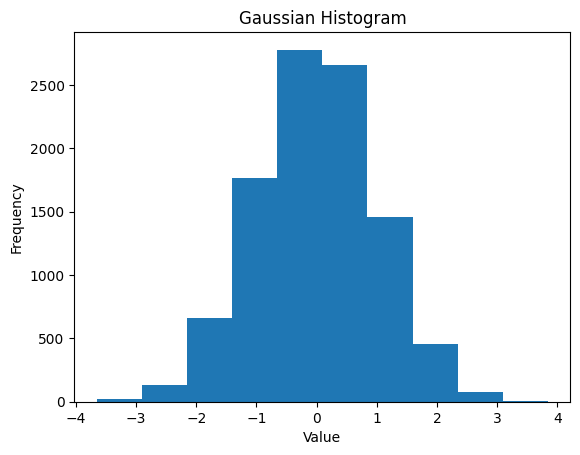

In [79]:
# normal distribution histogram
gaussian_numbers = np.random.randn(10000)
plt.hist(gaussian_numbers)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

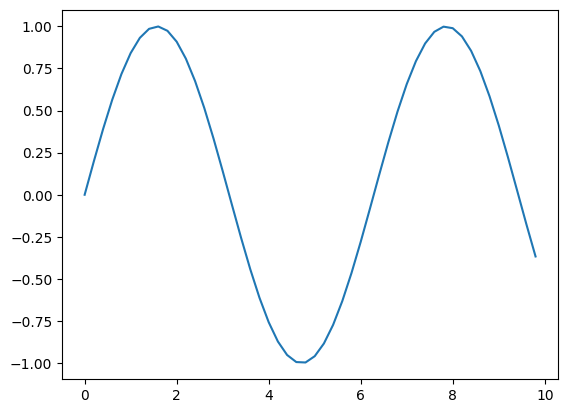

In [80]:
# line plot 
x = np.arange(0, 10, 0.2)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

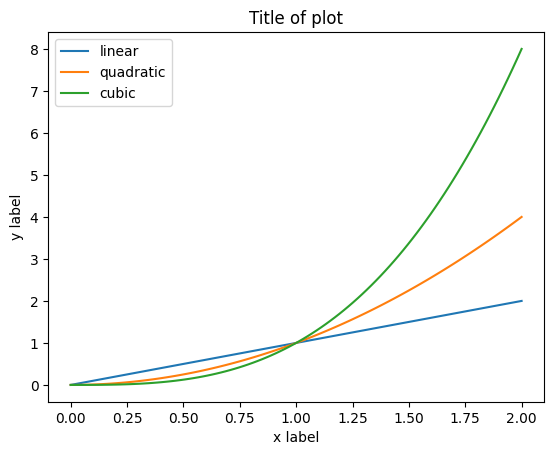

In [81]:
# Multiple plots
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Title of plot")

plt.legend()
plt.show()

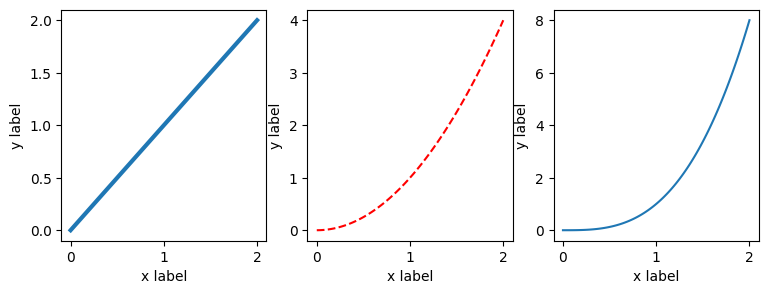

In [82]:
x = np.linspace(0, 2, 100)

plt.figure(1, figsize=(9, 3)) 

plt.subplot(131)
plt.xlabel('x label')
plt.ylabel('y label')
plt.plot(x, x, label='linear', linewidth=3)

plt.subplot(132)
plt.xlabel('x label')
plt.ylabel('y label')
plt.plot(x, x**2, 'r--', label='quadratic')

plt.subplot(133)
plt.xlabel('x label')
plt.ylabel('y label')
plt.plot(x, x**3, label='cubic')

plt.show()

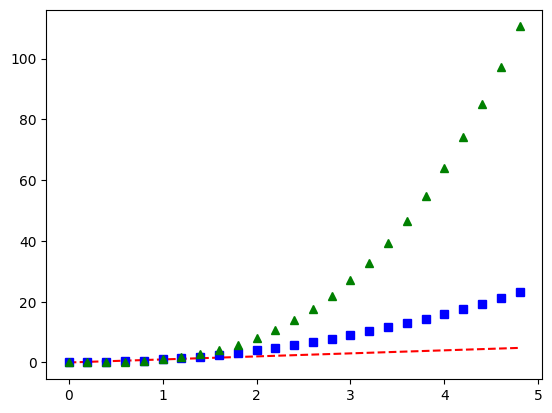

In [83]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

## Itertools Examples

In [84]:
fruit = ['apple', 'banana', 'pear', 'grapefruit', 'orange']
list(it.combinations(fruit, 2))

[('apple', 'banana'),
 ('apple', 'pear'),
 ('apple', 'grapefruit'),
 ('apple', 'orange'),
 ('banana', 'pear'),
 ('banana', 'grapefruit'),
 ('banana', 'orange'),
 ('pear', 'grapefruit'),
 ('pear', 'orange'),
 ('grapefruit', 'orange')]

In [85]:
x = [1, 2, 3]
y = ['a', 'b', 'c']
list(zip(x, y))

[(1, 'a'), (2, 'b'), (3, 'c')]

In [86]:
x = [1, 2, 3, 4, 5]
y = ['a', 'b', 'c']
list(it.zip_longest(x, y))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, None), (5, None)]

In [87]:
a = [1, 2, 3]
b = [4, 5, 6]
list(map(op.mul, a, b))

[4, 10, 18]

In [88]:
cycle_ = it.cycle(["Hi", "low"])
[next(cycle_) for _ in range(5)]

['Hi', 'low', 'Hi', 'low', 'Hi']

In [89]:
a = [5, 6, 7]
b = [8, 9, 10]
list(it.product(a, b))

[(5, 8), (5, 9), (5, 10), (6, 8), (6, 9), (6, 10), (7, 8), (7, 9), (7, 10)]

In [90]:
letters = 'abcde'
print(list(it.permutations(letters, 2)))
print('')
numbers = range(5)
print(list(it.permutations(numbers, 2)))

[('a', 'b'), ('a', 'c'), ('a', 'd'), ('a', 'e'), ('b', 'a'), ('b', 'c'), ('b', 'd'), ('b', 'e'), ('c', 'a'), ('c', 'b'), ('c', 'd'), ('c', 'e'), ('d', 'a'), ('d', 'b'), ('d', 'c'), ('d', 'e'), ('e', 'a'), ('e', 'b'), ('e', 'c'), ('e', 'd')]

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3)]


In [91]:
x = list(range(6))
print(x)
list(it.accumulate(x))

[0, 1, 2, 3, 4, 5]


[0, 1, 3, 6, 10, 15]